In [ ]:
from google.colab import files
import zipfile
import os
import gensim.downloader as api
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import numpy as np
from sklearn.preprocessing import LabelEncoder
import string
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Part 1

In [ ]:
wv=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
print(wv.most_similar("king"))

[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797567367553711), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]


In [ ]:
print(wv.most_similar("strawberry"))

[('strawberries', 0.7941855192184448), ('blueberry', 0.7661275863647461), ('berry', 0.7010524272918701), ('tomato', 0.6888598203659058), ('peaches', 0.6870250701904297), ('peach', 0.6729939579963684), ('blueberries', 0.6703205704689026), ('rhubarb', 0.6661683917045593), ('berries', 0.6629611253738403), ('cherries', 0.6624119281768799)]


In [ ]:
print(wv.most_similar("milk"))

[('dairy', 0.7323603630065918), ('cow_milk', 0.6860159039497375), ('milk_powder', 0.6646486520767212), ('camels_Nancy_Riegler', 0.6561244130134583), ('powdered_milk', 0.6497933268547058), ('raw_milk', 0.6309321522712708), ('goat_milk', 0.6260650157928467), ('apple_juice', 0.6173229813575745), ('whey', 0.6159118413925171), ('chocolate_caramel_mousse', 0.6145174503326416)]


In [ ]:
print(wv.most_similar("blanket"))

[('blankets', 0.6101428270339966), ('woolen_blanket', 0.5342123508453369), ('sleeping_bag', 0.5239027738571167), ('comforter', 0.5063499808311462), ('fleece_blanket', 0.4957716464996338), ('pillow', 0.4939947724342346), ('Adamses_wrapped_Woods', 0.4930483400821686), ('duvet', 0.4877651333808899), ('blankie', 0.479836642742157), ('cloth', 0.47882649302482605)]


In [ ]:
result = wv['king'] - wv['man'] + wv['woman']

In [ ]:
similar_words = wv.similar_by_vector(result)
print(similar_words)

[('king', 0.8449392318725586), ('queen', 0.7300517559051514), ('monarch', 0.645466148853302), ('princess', 0.6156251430511475), ('crown_prince', 0.5818676352500916), ('prince', 0.5777117609977722), ('kings', 0.5613663792610168), ('sultan', 0.5376775860786438), ('Queen_Consort', 0.5344247817993164), ('queens', 0.5289887189865112)]


In [ ]:
result = wv['strawberry'] - wv['icecream'] + wv['milkshake']

In [ ]:
similar_words = wv.similar_by_vector(result)
print(similar_words)

[('milkshake', 0.6998642086982727), ('strawberry', 0.6106910109519958), ('blueberry', 0.45324862003326416), ('tomato', 0.4451974034309387), ('strawberries', 0.4448387324810028), ('berry', 0.4444733262062073), ('celery', 0.44000643491744995), ('citrus', 0.4386843144893646), ('chocolate_malt', 0.4321674704551697), ('raspberry', 0.42162296175956726)]


# Part 2

In [ ]:
data=files.upload()

Saving Imdb.zip to Imdb.zip


In [ ]:
with zipfile.ZipFile('Imdb.zip','r') as zip_ref:
  zip_ref.extractall('Imdb')

In [ ]:
data='/content/Imdb/IMDB Dataset.csv'

In [ ]:
dat=pd.read_csv(data)
df=pd.DataFrame(dat)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer=WordNetLemmatizer()
stopwords=set(stopwords.words('english'))

In [ ]:
def preprocess(text,word_remove=None):
  text=text.lower()
  text=text.translate(str.maketrans("","",string.punctuation))
  tokens=word_tokenize(text)
  tokens=[lemmatizer.lemmatize(word)for word in tokens if word not in stopwords and word != word_remove]
  return " ".join(tokens)

In [ ]:
df['cleaned_text']=df['review'].apply(lambda text: preprocess(text,word_remove='br'))
df=df.drop('review',axis=1)
df.head()

,sentiment,cleaned_text
0,positive,one reviewer mentioned watching 1 oz episode y...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically there family little boy jake think t...
4,positive,petter matteis love time money visually stunni...


In [ ]:
le=LabelEncoder()
df["sentiment"]=le.fit_transform(df["sentiment"])

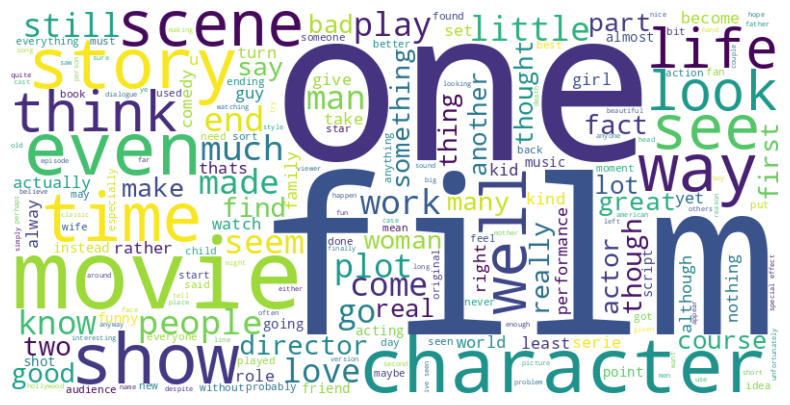

In [ ]:
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
skipgram = Word2Vec(
    sentences=df['cleaned_text'].tolist(),
    sg=1,
    vector_size=50,
    window=5,
    min_count=1,
)

In [ ]:
skipgram.save("skipgram.model")

In [ ]:
model = Word2Vec.load("skipgram.model")

In [ ]:
word_vectors = model.wv
def get_skip(words):
    embedding = [word_vectors[word] for word in words if word in word_vectors]
    return np.mean(embedding, axis=0)

In [ ]:
embedding=df['cleaned_text'].apply(get_skip)

,cleaned_text
0,"[-0.08734738, -0.03654609, 0.034666173, 0.02488097, -0.036124423, -0.01841883, -0.0077848826, 0.051585805, -0.1414543, -0.048214383, 0.034530494, -0.03977637, 0.076381005, -0.025702946, 0.009010147, 0.0065653967, 0.044729453, 0.11396569, -0.22204416, -0.09803928, -0.0028651396, -0.004869479, 0.23650865, 0.013590397, -0.028489513, -0.07710544, -0.022165775, 0.037511535, -0.15157276, 0.113150835, 0.11020052, -0.08537094, -0.0476938, -0.06507591, -0.012520097, -0.05566902, -0.026751073, -0.0002920714, -0.00943033, -0.006493878, -0.06190649, -0.07235492, -0.20298398, -0.08881544, 0.22591342, -0.047325905, 0.10710205, 0.03976147, 0.10002067, -0.103926]"
1,"[-0.08781827, -0.037130944, 0.037124444, 0.019422729, -0.04135847, -0.025574982, -0.008484757, 0.044406, -0.13532154, -0.047945045, 0.03505058, -0.0413455, 0.07812317, -0.021959633, 0.010523011, 0.0074561527, 0.039100584, 0.11340759, -0.21959722, -0.096891366, 0.00056796696, -0.0014612156, 0.24123852, 0.014982747, -0.019032614, -0.079100534, -0.022318158, 0.036741134, -0.15204033, 0.11732499, 0.113579676, -0.093452975, -0.049679626, -0.06896507, -0.0150857065, -0.061083753, -0.02736344, 0.00432386, -0.011849446, -0.0055372277, -0.06522362, -0.07970646, -0.19970585, -0.08715126, 0.22622307, -0.046134733, 0.10105739, 0.03555913, 0.103273675, -0.10499772]"
2,"[-0.08834264, -0.03725644, 0.03394769, 0.025640465, -0.034186974, -0.01920374, -0.0045826165, 0.049167298, -0.14542775, -0.049389005, 0.0338603, -0.041985285, 0.081926614, -0.02380624, 0.009132575, 0.008781424, 0.045083724, 0.10920487, -0.22230078, -0.10033637, -0.0037201717, -0.0012034412, 0.23728143, 0.013658751, -0.022598343, -0.07621159, -0.020320041, 0.038315825, -0.15120636, 0.11236211, 0.11139144, -0.083750576, -0.048183102, -0.06385968, -0.015812982, -0.054853722, -0.026906662, -0.0023932806, -0.0093305865, -0.003912517, -0.05942508, -0.07545931, -0.2002482, -0.093720324, 0.22712493, -0.047349293, 0.103057444, 0.039066892, 0.09919426, -0.10342319]"
3,"[-0.08947313, -0.031626206, 0.029919663, 0.026487624, -0.03408298, -0.01948609, -0.0071368376, 0.05777291, -0.14183524, -0.044884067, 0.031781763, -0.04887075, 0.08507932, -0.023677107, 0.0061578862, 0.010697615, 0.04553042, 0.109333955, -0.21638426, -0.10021818, -0.004098851, 0.003819047, 0.23871438, 0.011179835, -0.022289986, -0.07135252, -0.025257675, 0.039052453, -0.152791, 0.11460232, 0.10850862, -0.0825441, -0.050079204, -0.072002925, -0.015461629, -0.06327523, -0.025611883, -0.006196564, -0.004763118, -0.006441979, -0.0602714, -0.082352266, -0.20014615, -0.08830326, 0.22110516, -0.047821473, 0.10502361, 0.04170371, 0.10135954, -0.10199019]"
4,"[-0.085637376, -0.039575025, 0.040373836, 0.024178565, -0.04021146, -0.023008784, -0.006055984, 0.048110433, -0.14045948, -0.04614847, 0.04065057, -0.041431505, 0.07829811, -0.022608649, 0.012780218, 0.011996727, 0.045798887, 0.116013914, -0.21703415, -0.09771933, -0.00044647526, -0.0053470195, 0.23777233, 0.016249426, -0.022439478, -0.07615601, -0.027743952, 0.039989136, -0.15549125, 0.11791087, 0.11229361, -0.0897799, -0.051504165, -0.06090014, -0.01632828, -0.053626884, -0.027176797, -0.0014968112, -0.010988612, -0.0071136532, -0.06510865, -0.071174815, -0.20326245, -0.0878656, 0.22212985, -0.04606157, 0.10547852, 0.035264216, 0.10458348, -0.10617093]"


In [ ]:
data=pd.DataFrame(embedding.tolist())
final_df_skip=pd.concat([df,data],axis=1)
final_df_skip

,sentiment,cleaned_text,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,one reviewer mentioned watching 1 oz episode y...,-0.087347,-0.036546,0.034666,0.024881,-0.036124,-0.018419,-0.007785,0.051586,...,-0.061906,-0.072355,-0.202984,-0.088815,0.225913,-0.047326,0.107102,0.039761,0.100021,-0.103926
1,1,wonderful little production filming technique ...,-0.087818,-0.037131,0.037124,0.019423,-0.041358,-0.025575,-0.008485,0.044406,...,-0.065224,-0.079706,-0.199706,-0.087151,0.226223,-0.046135,0.101057,0.035559,0.103274,-0.104998
2,1,thought wonderful way spend time hot summer we...,-0.088343,-0.037256,0.033948,0.025640,-0.034187,-0.019204,-0.004583,0.049167,...,-0.059425,-0.075459,-0.200248,-0.093720,0.227125,-0.047349,0.103057,0.039067,0.099194,-0.103423
3,0,basically there family little boy jake think t...,-0.089473,-0.031626,0.029920,0.026488,-0.034083,-0.019486,-0.007137,0.057773,...,-0.060271,-0.082352,-0.200146,-0.088303,0.221105,-0.047821,0.105024,0.041704,0.101360,-0.101990
4,1,petter matteis love time money visually stunni...,-0.085637,-0.039575,0.040374,0.024179,-0.040211,-0.023009,-0.006056,0.048110,...,-0.065109,-0.071175,-0.203262,-0.087866,0.222130,-0.046062,0.105479,0.035264,0.104583,-0.106171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,thought movie right good job wasnt creative or...,-0.086533,-0.036337,0.032381,0.029584,-0.033794,-0.018310,0.001792,0.054675,...,-0.060279,-0.072288,-0.199527,-0.084824,0.226494,-0.051258,0.103798,0.035599,0.101704,-0.109000
49996,0,bad plot bad dialogue bad acting idiotic direc...,-0.085359,-0.038913,0.030373,0.019916,-0.034148,-0.015979,-0.007695,0.051427,...,-0.060398,-0.068202,-0.206190,-0.086333,0.222280,-0.044271,0.110689,0.041076,0.102949,-0.101308
49997,0,catholic taught parochial elementary school nu...,-0.088610,-0.038049,0.031809,0.023985,-0.036043,-0.018664,-0.005647,0.052250,...,-0.059861,-0.073316,-0.202479,-0.090012,0.222418,-0.043913,0.109649,0.038156,0.100923,-0.105393
49998,0,im going disagree previous comment side maltin...,-0.085808,-0.037730,0.038167,0.023105,-0.040316,-0.022447,-0.006103,0.046154,...,-0.062788,-0.074940,-0.204631,-0.086166,0.225437,-0.049300,0.104420,0.037667,0.101945,-0.106909


In [ ]:
X=final_df_skip.drop(['sentiment','cleaned_text'],axis=1)
Y=final_df_skip['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5742


In [ ]:
cbow = Word2Vec(
    sentences=df['cleaned_text'].tolist(), # list of list of tokens
    sg=0,
    vector_size=50,
    window=5,
    min_count=1,
)

cbow.save("cbow.model")

model = Word2Vec.load("cbow.model")

word_vectors = model.wv
def get_cbow(words):
    embedding = [word_vectors[word] for word in words if word in word_vectors]
    return np.mean(embedding, axis=0)

embedding=df['cleaned_text'].apply(get_cbow)
embedding.head()

data=pd.DataFrame(embedding.tolist())
final_df_cbow=pd.concat([df,data],axis=1)
final_df_cbow

,sentiment,cleaned_text,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,one reviewer mentioned watching 1 oz episode y...,0.039112,-0.003594,0.007788,0.094644,0.003604,0.028402,0.231588,0.082949,...,0.324483,-0.065773,-0.044263,0.037332,0.204112,0.106989,0.019998,-0.077575,0.033415,0.006765
1,1,wonderful little production filming technique ...,0.064085,-0.009631,0.033170,0.106523,-0.018346,0.031688,0.245636,0.086148,...,0.331888,-0.093077,-0.088344,0.059500,0.192316,0.084470,0.016919,-0.066957,0.036607,-0.037601
2,1,thought wonderful way spend time hot summer we...,0.030861,0.001225,0.006100,0.116012,0.009611,0.021247,0.253817,0.100939,...,0.300265,-0.064269,-0.051434,0.050793,0.208720,0.085691,0.021219,-0.095262,0.024739,-0.008785
3,0,basically there family little boy jake think t...,0.023215,0.014048,0.024844,0.146023,0.018572,0.013295,0.255115,0.103059,...,0.288891,-0.083784,-0.052614,0.068329,0.193785,0.098736,-0.000316,-0.110671,0.018824,0.000599
4,1,petter matteis love time money visually stunni...,0.025695,-0.021862,0.020784,0.108775,-0.014368,0.041695,0.247089,0.089731,...,0.334700,-0.094689,-0.064505,0.055323,0.205713,0.080199,0.046732,-0.040880,0.029498,-0.001110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,thought movie right good job wasnt creative or...,0.005350,0.000888,0.005535,0.089105,0.003300,0.037162,0.243794,0.095587,...,0.313299,-0.081909,-0.044244,0.034817,0.176289,0.079188,0.040663,-0.068719,0.023848,-0.008151
49996,0,bad plot bad dialogue bad acting idiotic direc...,0.059224,-0.009481,0.018993,0.089159,0.026119,0.022387,0.203902,0.082546,...,0.353032,-0.028235,-0.018201,0.027948,0.205405,0.108452,0.017758,-0.083569,0.018090,0.017463
49997,0,catholic taught parochial elementary school nu...,0.048341,-0.019519,0.020956,0.105852,0.012221,0.009968,0.212226,0.087631,...,0.339503,-0.054001,-0.053901,0.036654,0.214263,0.093422,0.012497,-0.089434,0.033036,-0.011268
49998,0,im going disagree previous comment side maltin...,0.047247,0.001872,0.017929,0.094132,-0.007976,0.034549,0.244785,0.074199,...,0.324314,-0.077572,-0.062401,0.047155,0.182734,0.104032,0.028956,-0.066865,0.030420,-0.000425


In [ ]:
X=final_df_cbow.drop(['sentiment','cleaned_text'],axis=1)
Y=final_df_cbow['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5969
